# Making predictions using the MNIST dataset


<img src="./images/mnist-sample.png" style="height:200px"/>

The MNIST dataset is the most used example that serves as the starting
point for learning Computer Vision.

It contains a large number of handwritten digits (from 0 to 9) and can be
used to train and understand image processors and predictors.

Each digit is normalized to a 28 X 28 grid of pixels whose value ranges from
0 to 255. 

The original paper that presented the dataset and trained a SVM model with a 0.8
error rate.

As we can see from various comparisons that have been done the SVM 
model performs very well in the MNIST dataset and it is only very 
deep CNN that will outperform it when using a much more expensive
setup that will require complicated software and specialized hardware:

https://www.lri.fr/~marc/Master2/MNIST_doc.pdf

http://yann.lecun.com/exdb/mnist/


In [87]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from keras.utils import to_categorical
import pickle


%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

# Load the dataset 

The MNIST dataset can be loaded from many different repos on the internet.

It is also part of the standard datasets in keras:

```python
from keras.datasets import mnist
```

and scikit as well:

```python
from sklearn.datasets import load_digits
```

the original data set can be downloaded from here:

http://yann.lecun.com/exdb/mnist/

For this notebook, I have downloaded the related from kaggle:

https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

which makes our task a bit easier since it provides us with "clean" data
that are already presented in a numpu friendly way and we do not need
to transformt the binary image data to structured arrays which is what
we will be using to train the SVM models.


In [88]:
all_data = pd.read_csv("./data/mnist_train.csv")
all_data = df.dropna()    
all_labels = pd.DataFrame(all_data.pop("label"))

### Data Description 

At this point we have two different dataframes holding the complete universe of the mnist data:

#### all_data

Holds the **features** that consist of a flat array of a $784$ dimentional vector.

Each element of this vector corresponds to one **pixel** of a **28 X 28** grid that represents
a digit image.

#### all_labels

Holds the **labels** for each sample that exist in the **all_data** table; it is nothing more
that the digit that corresponds to the image meaning its value ranges from 0 - 9.


In [89]:
all_data

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
all_data.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [91]:
all_labels

,label
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


# Split the Data to testing and training data sets

As we always have to do, we separate the available data to two different 
subsets:

### Training DataSet

Will be used to train the model; since the data in this set will become
known to the model they are increasing the possibility of overfitting (meaning
to come up with a model that knows very well the dataset but cannot generalize 
well to unseen data).

### Testing DataSet

The testing data is a small portion of the full universe of available data (here we 
chose to use 20% of it); these data will never be seen from the model during its
training phase.  

We will use these data to verify the behavior of the model after it will be trained
to increase our confifence on it and its prediction accuracy.

In [92]:
normalized_all_data = all_data / 255

X_train, X_test, y_train, y_test = train_test_split(normalized_all_data, all_labels, test_size=0.2)

print(f"Training Data \n\tNumber of features: {X_train.shape[0]}\n\tNumber of Labels,,: {y_train.shape[0]} ")
print(f"Testing  Data \n\tNumber of features: {X_test.shape[0]}\n\tNumber of Labels..: {y_test.shape[0]} ")


Training Data 
	Number of features: 48000
	Number of Labels,,: 48000 
Testing  Data 
	Number of features: 12000
	Number of Labels..: 12000 


# Inspect the dataset


Check how "balanced" our dataset is in terms of the total number of
each label; we inspect both the training and testing data sets and 
visually we can see that it looks balanced enought to the point of 
not destruct the SVM model that we will try to train.

In [93]:
def show_labels(title, df):
    counters = []
    labels = []
    for digit in range(0, 10):
        c = df[df.label==digit].shape[0]
        counters.append(df[df.label==digit].shape[0])
        labels.append(f"{digit}: {c}")
    _ = plt.pie(counters, labels=labels)
    _ = plt.title(title)

### Frequency of each digit in the training data

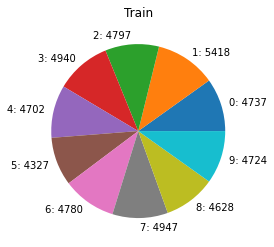

In [94]:
show_labels("Train", y_train)

### Frequency of each digit in the testing data

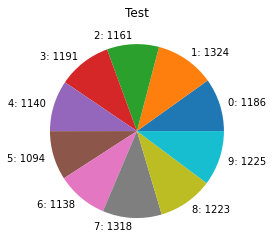

In [95]:
show_labels("Test", y_test)

### View of random digits 

In [96]:
def plot_digits_by_range(ds, index1, index2):
    index2 += (index2 - index1) % 10
    ncols = 10
    nrows = int((index2 - index1) / 10)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 6))
    for row in range(nrows):
        for col in range(ncols):
            index = row * 5 + col
            d = ds.iloc[[index]]
            d = d.to_numpy()
            d = d.reshape((28, 28))
            if nrows > 1:
                axes[row, col].imshow(d, cmap=plt.get_cmap('gray'))
                axes[row, col].axis('off')
            else:
                axes[col].imshow(d, cmap=plt.get_cmap('gray'))
                axes[col].axis('off')
    fig.tight_layout()
    plt.show()
    
def save_model(filepath, model):
    with open(filepath,'wb') as f:
        pickle.dump(clf, model)
        
def load_model(filepath):
    with open(filepath, 'rb') as f:
        return pickle.load(f)


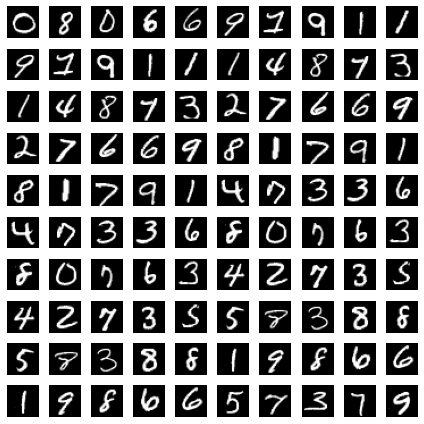

In [97]:
plot_digits_by_range(X_train, 1000, 1100)

In [98]:
def check_model_predictions(*, model, features, expected_labels):
    y_pred=model.predict(features)
    accuracy = accuracy_score(expected_labels, y_pred)
    print('Accuracy : {0:0.4f}'. format(accuracy))
    _ = plt.pie([accuracy, 1-accuracy], labels=[f"correct: {accuracy* 100:3.1f}%", "wrong"])
    cm = confusion_matrix(y_test, y_pred)
    plt.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot = True, fmt = 'g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


# Build a Linear SVM model

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [99]:
svm = LinearSVC(dual=False)
svm.fit(X_train, y_train)

LinearSVC(dual=False)

Accuracy : 0.9117


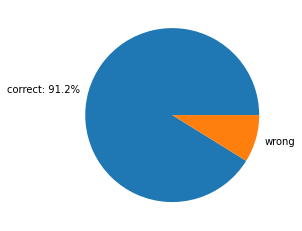

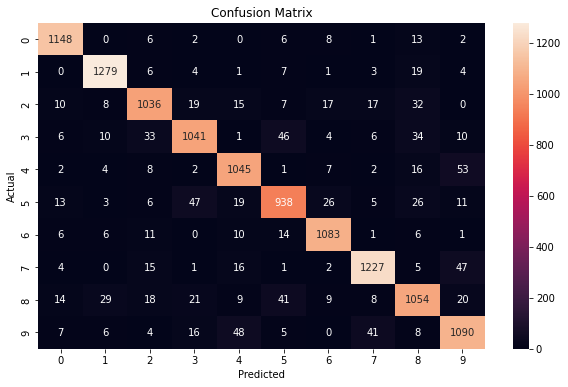

In [100]:
check_model_predictions(model=svm, features=X_test, expected_labels=y_test)


In [101]:
def train_linear_SVM_models(*args):
    models = {}
    for C in args:
        svm = LinearSVC(dual=False, C=C)
        svm.fit(X_train, y_train)
        models[C] = svm
    return models

In [102]:
models = train_linear_SVM_models(0.1, 1, 10)

C=0.1
Accuracy : 0.9127


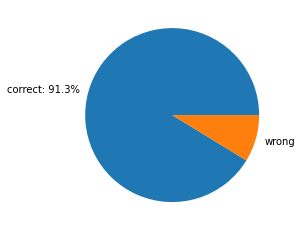

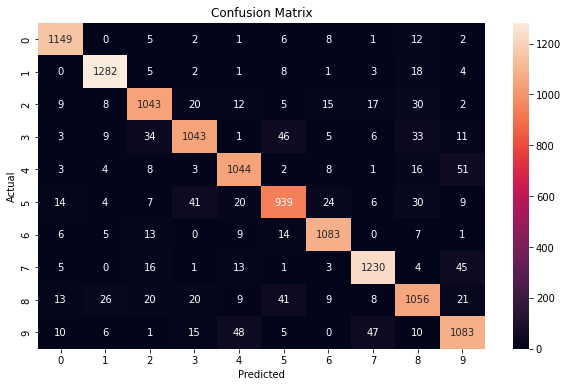

C=1
Accuracy : 0.9117


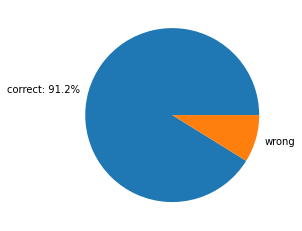

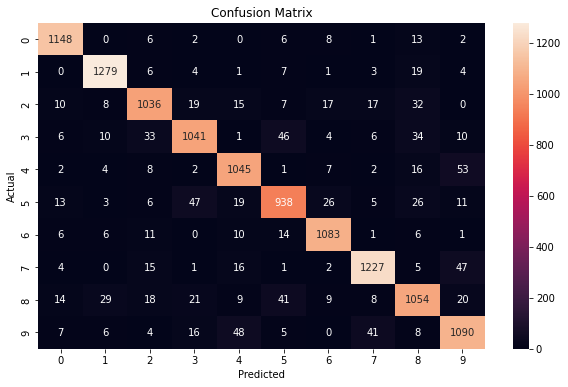

C=10
Accuracy : 0.9119


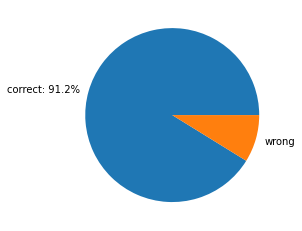

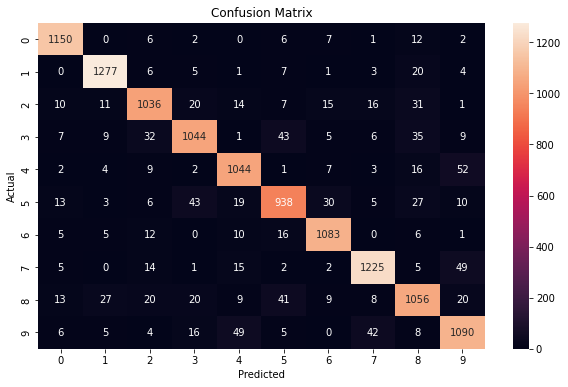

In [103]:
for C, model in models.items():
    print(f"C={C}")
    check_model_predictions(model=model, features=X_test, expected_labels=y_test)

In [104]:
clf=SVC(kernel='rbf', C=5, verbose=False) 
clf.fit(X_train, y_train)

SVC(C=5)

Accuracy : 0.9829


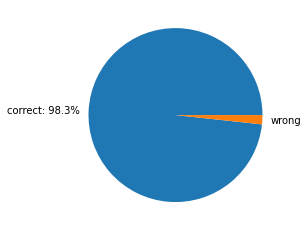

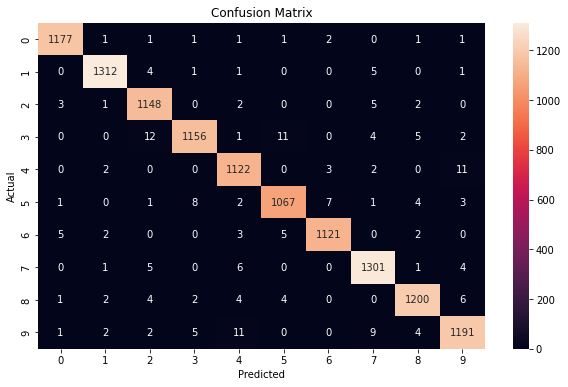

In [105]:
check_model_predictions(model=clf, features=X_test, expected_labels=y_test)

In [106]:
clf=SVC(C=5, gamma=0.05) 
clf.fit(X_train, y_train)

SVC(C=5, gamma=0.05)

Accuracy : 0.9828


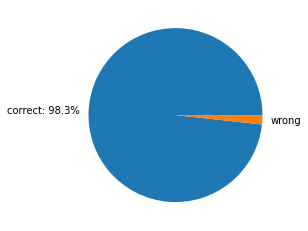

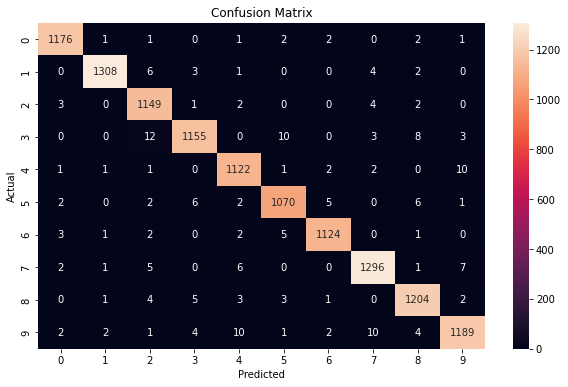

In [107]:
check_model_predictions(model=clf, features=X_test, expected_labels=y_test)

# Build a Neural Network to predict digits 

In [120]:
df = pd.read_csv("./data/mnist_train.csv")
df = df.dropna()    

Y = pd.DataFrame(df["label"].copy())
Y = pd.DataFrame(to_categorical(Y))

X = df.drop(["label"], axis=1)
X = X / 255

x_train = X.iloc[:50000]
x_test = X.iloc[50000:]

y_train = Y.iloc[:50000]
y_test = Y.iloc[50000:]

train_X, validation_x, train_y, validation_y = train_test_split(x_train, y_train, test_size=0.2)

In [153]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(28*28),
    tf.keras.layers.Dense(355, activation='sigmoid'),
    tf.keras.layers.Dense(355, activation='sigmoid'),
    tf.keras.layers.Dense(355, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [154]:
history = model.fit(train_X, train_y, batch_size=2000, epochs=120, shuffle=True ,validation_data=(validation_x, validation_y), verbose=0)

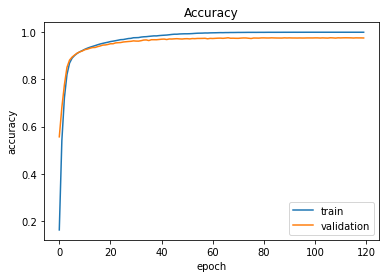

In [155]:
#Accuracy plot
plt.figure()
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()


313/313 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9771
Accuracy:   0.9771


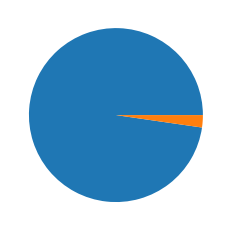

In [156]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy: {test_acc:8.4}')
_ = plt.pie([test_acc, 1 - test_acc])